In [126]:
import requests
import pandas as pd
import time
import re
import ast
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
import numpy as np 
from scipy.stats import skew
from scipy.stats import kurtosis



In [ ]:
url = "https://api.rawg.io/api/games"
api_key = "8f55139ba39346fe986f6bf27908ddb7"
params = {"key": api_key}

response = requests.get(url, params=params)
data = response.json()

df = pd.DataFrame(data['results'])

print(df.columns)


Index(['id', 'slug', 'name', 'released', 'tba', 'background_image', 'rating',
       'rating_top', 'ratings', 'ratings_count', 'reviews_text_count', 'added',
       'added_by_status', 'metacritic', 'playtime', 'suggestions_count',
       'updated', 'user_game', 'reviews_count', 'saturated_color',
       'dominant_color', 'platforms', 'parent_platforms', 'genres', 'stores',
       'clip', 'tags', 'esrb_rating', 'short_screenshots'],
      dtype='str')


In [43]:
print(response.json()['count'])

897743


# 10000 Juegos

In [ ]:

api_key = "8f55139ba39346fe986f6bf27908ddb7"
url = "https://api.rawg.io/api/games"
lista_final = []

print("Iniciando descarga de 10000 juegos...")

for pagina in range(1, 251):  # 250 páginas * 40 juegos = 10000
    params = {
        "key": api_key,
        "page": pagina,
        "page_size": 40,
    }
    
    try:
        response = requests.get(url, params=params)
        data = response.json()
        
        if 'results' in data:
            lista_final.extend(data['results'])
            print(f"Progreso: {len(lista_final)}/10000 juegos descargados", end="\r")
        
        time.sleep(0.2) 
        
    except Exception as e:
        print(f"\nError en página {pagina}: {e}")
        break

#DF FINAL
df = pd.DataFrame(lista_final)

print(f"\n\n¡Listo! DataFrame creado con {len(df)} filas.")
print(df[['name', 'rating', 'released']].head())

Iniciando descarga de 10000 juegos...
Progreso: 10000/10000 juegos descargados

¡Listo! DataFrame creado con 10000 filas.
                               name  rating    released
0                Grand Theft Auto V    4.47  2013-09-17
1          The Witcher 3: Wild Hunt    4.64  2015-05-18
2                          Portal 2    4.58  2011-04-18
3  Counter-Strike: Global Offensive    3.57  2012-08-21
4                Tomb Raider (2013)    4.06  2013-03-05


In [ ]:
# Definimos las columnas exactas que usa la API
columnas_interes = [
    'name', 'released', 'rating', 'ratings_count', 
    'added', 'added_by_status', 'reviews_count', 
    'genres', 'tags', 'parent_platforms'
]

# Creamos la copia filtrada
df_copia1 = df[columnas_interes].copy()

# Opcional: Limpiar las columnas complejas (genres, tags, platforms) 
# para que no aparezcan como listas de diccionarios
df_copia1['genres'] = df_copia1['genres'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
df_copia1['tags'] = df_copia1['tags'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
df_copia1['parent_platforms'] = df_copia1['parent_platforms'].apply(lambda x: [i['platform']['name'] for i in x] if isinstance(x, list) else [])

print(df_copia1.head())

                               name    released  rating  ratings_count  added  \
0                Grand Theft Auto V  2013-09-17    4.47           7316  22441   
1          The Witcher 3: Wild Hunt  2015-05-18    4.64           7123  22086   
2                          Portal 2  2011-04-18    4.58           6047  20803   
3  Counter-Strike: Global Offensive  2012-08-21    3.57           3617  18331   
4                Tomb Raider (2013)  2013-03-05    4.06           4070  17757   

                                     added_by_status  reviews_count  \
0  {'yet': 556, 'owned': 12845, 'beaten': 6434, '...           7434   
1  {'yet': 1203, 'owned': 12843, 'beaten': 5269, ...           7242   
2  {'yet': 672, 'owned': 13085, 'beaten': 5831, '...           6103   
3  {'yet': 268, 'owned': 14095, 'beaten': 1139, '...           3655   
4  {'yet': 701, 'owned': 11578, 'beaten': 4504, '...           4103   

              genres                                               tags  \
0          

In [46]:
df_copia1

,name,released,rating,ratings_count,added,added_by_status,reviews_count,genres,tags,parent_platforms
0,Grand Theft Auto V,2013-09-17,4.47,7316,22441,"{'yet': 556, 'owned': 12845, 'beaten': 6434, '...",7434,[Action],"[Singleplayer, Steam Achievements, Multiplayer...","[PC, PlayStation, Xbox]"
1,The Witcher 3: Wild Hunt,2015-05-18,4.64,7123,22086,"{'yet': 1203, 'owned': 12843, 'beaten': 5269, ...",7242,"[Action, RPG]","[Singleplayer, Full controller support, Atmosp...","[PC, PlayStation, Xbox, Apple Macintosh, Ninte..."
2,Portal 2,2011-04-18,4.58,6047,20803,"{'yet': 672, 'owned': 13085, 'beaten': 5831, '...",6103,"[Shooter, Puzzle]","[Singleplayer, Steam Achievements, Multiplayer...","[PC, PlayStation, Xbox, Apple Macintosh, Linux]"
3,Counter-Strike: Global Offensive,2012-08-21,3.57,3617,18331,"{'yet': 268, 'owned': 14095, 'beaten': 1139, '...",3655,[Shooter],"[Steam Achievements, Multiplayer, Full control...","[PC, PlayStation, Xbox, Linux]"
4,Tomb Raider (2013),2013-03-05,4.06,4070,17757,"{'yet': 701, 'owned': 11578, 'beaten': 4504, '...",4103,[Action],"[Singleplayer, Multiplayer, Full controller su...","[PC, PlayStation, Xbox, Apple Macintosh]"
...,...,...,...,...,...,...,...,...,...,...
9995,Dungeon Hunter: Alliance,2011-04-06,3.23,26,195,"{'yet': 2, 'owned': 172, 'beaten': 7, 'toplay'...",26,"[Action, RPG]","[Multiplayer, Controller, Dark, online, consol...",[PlayStation]
9996,The Impossible Game,2010-04-20,3.62,21,195,"{'yet': 3, 'owned': 176, 'beaten': 10, 'droppe...",21,"[Action, Arcade, Casual, Indie]","[Singleplayer, Steam Achievements, Full contro...","[PC, PlayStation, iOS, Android, Apple Macintos..."
9997,The House of the Dead: OVERKILL Extended Cut,2012-09-04,3.42,24,195,"{'yet': 6, 'owned': 156, 'beaten': 18, 'toplay...",24,[Shooter],"[Horror, Gore, Controller, Story, online, Movi...",[PlayStation]
9998,Brothers: A Tale of Two Sons Remake,2024-02-27,3.86,35,194,"{'yet': 24, 'owned': 42, 'beaten': 39, 'toplay...",35,"[Adventure, Casual]","[Singleplayer, Steam Achievements, Multiplayer...",[PC]


In [47]:
import pandas as pd

# Esto crea columnas como: yet, owned, beaten, toplay, dropped, playing
df_status = df_copia1['added_by_status'].apply(pd.Series)
# Opcional: renombrarlas para que sean más claras
df_status = df_status.add_prefix('status_')

#Procesar 'tags' para identificar Singleplayer o Multiplayer
def identificar_modo(lista_tags):
    # Convertimos a minúsculas para evitar errores
    tags_lower = [t.lower() for t in lista_tags]
    es_single = 'singleplayer' in tags_lower
    es_multi = 'multiplayer' in tags_lower
    
    if es_single and es_multi:
        return 'Both'
    elif es_single:
        return 'Singleplayer'
    elif es_multi:
        return 'Multiplayer'
    else:
        return 'Other'

# Aplicamos la función a la columna tags
df_copia1['game_mode'] = df_copia1['tags'].apply(identificar_modo)

# 3. Unir todo en el DataFrame final y borrar las columnas originales pesadas
df_final = pd.concat([df_copia1, df_status], axis=1)
df_final = df_final.drop(columns=['added_by_status', 'tags'], errors='ignore')

# Ver el resultado
print(df_final[['name', 'game_mode', 'status_owned', 'status_beaten']].head())

                               name     game_mode  status_owned  status_beaten
0                Grand Theft Auto V          Both       12845.0         6434.0
1          The Witcher 3: Wild Hunt  Singleplayer       12843.0         5269.0
2                          Portal 2          Both       13085.0         5831.0
3  Counter-Strike: Global Offensive   Multiplayer       14095.0         1139.0
4                Tomb Raider (2013)          Both       11578.0         4504.0


# Informacion General del Df_final

In [48]:
df_final.isna().sum()

name                   0
released             154
rating                 0
ratings_count          0
added                  0
reviews_count          0
genres                 0
parent_platforms       0
game_mode              0
status_yet            43
status_owned           0
status_beaten        753
status_toplay       1154
status_dropped       275
status_playing      3137
dtype: int64

In [49]:
df_final.isna().mean()

name                0.0000
released            0.0154
rating              0.0000
ratings_count       0.0000
added               0.0000
reviews_count       0.0000
genres              0.0000
parent_platforms    0.0000
game_mode           0.0000
status_yet          0.0043
status_owned        0.0000
status_beaten       0.0753
status_toplay       0.1154
status_dropped      0.0275
status_playing      0.3137
dtype: float64

In [50]:
print(df_final.head())


                               name    released  rating  ratings_count  added  \
0                Grand Theft Auto V  2013-09-17    4.47           7316  22441   
1          The Witcher 3: Wild Hunt  2015-05-18    4.64           7123  22086   
2                          Portal 2  2011-04-18    4.58           6047  20803   
3  Counter-Strike: Global Offensive  2012-08-21    3.57           3617  18331   
4                Tomb Raider (2013)  2013-03-05    4.06           4070  17757   

   reviews_count             genres  \
0           7434           [Action]   
1           7242      [Action, RPG]   
2           6103  [Shooter, Puzzle]   
3           3655          [Shooter]   
4           4103           [Action]   

                                    parent_platforms     game_mode  \
0                            [PC, PlayStation, Xbox]          Both   
1  [PC, PlayStation, Xbox, Apple Macintosh, Ninte...  Singleplayer   
2    [PC, PlayStation, Xbox, Apple Macintosh, Linux]          Both  

In [51]:
print(df_final.info())


<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              10000 non-null  str    
 1   released          9846 non-null   str    
 2   rating            10000 non-null  float64
 3   ratings_count     10000 non-null  int64  
 4   added             10000 non-null  int64  
 5   reviews_count     10000 non-null  int64  
 6   genres            10000 non-null  object 
 7   parent_platforms  10000 non-null  object 
 8   game_mode         10000 non-null  str    
 9   status_yet        9957 non-null   float64
 10  status_owned      10000 non-null  float64
 11  status_beaten     9247 non-null   float64
 12  status_toplay     8846 non-null   float64
 13  status_dropped    9725 non-null   float64
 14  status_playing    6863 non-null   float64
dtypes: float64(7), int64(3), object(2), str(3)
memory usage: 1.1+ MB
None


In [52]:
df_final.dtypes

name                    str
released                str
rating              float64
ratings_count         int64
added                 int64
reviews_count         int64
genres               object
parent_platforms     object
game_mode               str
status_yet          float64
status_owned        float64
status_beaten       float64
status_toplay       float64
status_dropped      float64
status_playing      float64
dtype: object

## Variables Categoricas

Released, Genres, Platform and Game Mode

## Variables Numericas
#### Discretas

Rating Count, Added, Reviews count, Status_yet, Status_owned, Status_beaten, Status_toplay, Status_dropped and Status_playing

## Continuas
Rating
    

# Limpieza del Df_final

In [53]:
df_final = df_final.dropna(subset=["released"])
df_final

,name,released,rating,ratings_count,added,reviews_count,genres,parent_platforms,game_mode,status_yet,status_owned,status_beaten,status_toplay,status_dropped,status_playing
0,Grand Theft Auto V,2013-09-17,4.47,7316,22441,7434,[Action],"[PC, PlayStation, Xbox]",Both,556.0,12845.0,6434.0,646.0,1183.0,777.0
1,The Witcher 3: Wild Hunt,2015-05-18,4.64,7123,22086,7242,"[Action, RPG]","[PC, PlayStation, Xbox, Apple Macintosh, Ninte...",Singleplayer,1203.0,12843.0,5269.0,852.0,1021.0,898.0
2,Portal 2,2011-04-18,4.58,6047,20803,6103,"[Shooter, Puzzle]","[PC, PlayStation, Xbox, Apple Macintosh, Linux]",Both,672.0,13085.0,5831.0,409.0,642.0,164.0
3,Counter-Strike: Global Offensive,2012-08-21,3.57,3617,18331,3655,[Shooter],"[PC, PlayStation, Xbox, Linux]",Multiplayer,268.0,14095.0,1139.0,80.0,2116.0,633.0
4,Tomb Raider (2013),2013-03-05,4.06,4070,17757,4103,[Action],"[PC, PlayStation, Xbox, Apple Macintosh]",Both,701.0,11578.0,4504.0,294.0,564.0,116.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Dungeon Hunter: Alliance,2011-04-06,3.23,26,195,26,"[Action, RPG]",[PlayStation],Multiplayer,2.0,172.0,7.0,1.0,12.0,1.0
9996,The Impossible Game,2010-04-20,3.62,21,195,21,"[Action, Arcade, Casual, Indie]","[PC, PlayStation, iOS, Android, Apple Macintos...",Singleplayer,3.0,176.0,10.0,NaN,6.0,NaN
9997,The House of the Dead: OVERKILL Extended Cut,2012-09-04,3.42,24,195,24,[Shooter],[PlayStation],Other,6.0,156.0,18.0,6.0,6.0,3.0
9998,Brothers: A Tale of Two Sons Remake,2024-02-27,3.86,35,194,35,"[Adventure, Casual]",[PC],Both,24.0,42.0,39.0,79.0,6.0,4.0


## Status_yet Cleaning

In [54]:
moda_yet = df_final["status_yet"].mode()[0]
moda_yet

np.float64(8.0)

In [55]:
df_final["status_yet"] = df_final["status_yet"].fillna(moda_yet)

## Status_beaten Cleaning

In [56]:
moda_beaten = df_final["status_beaten"].mode()[0]
moda_beaten

np.float64(1.0)

In [57]:
df_final["status_beaten"] = df_final["status_beaten"].fillna(moda_beaten)

## Status_toplay Cleaning

In [58]:
moda_toplay = df_final["status_toplay"].mode()[0]
moda_toplay

np.float64(1.0)

In [59]:
df_final["status_toplay"] = df_final["status_toplay"].fillna(moda_toplay)

## Status_dropped Cleaning

In [60]:
moda_dropped = df_final["status_dropped"].mode()[0]
moda_dropped

np.float64(2.0)

In [61]:
df_final["status_dropped"] = df_final["status_dropped"].fillna(moda_dropped)

## Status_playing Cleaning

In [62]:
moda_playing = df_final["status_playing"].mode()[0]
moda_playing

np.float64(1.0)

In [63]:
df_final["status_playing"] = df_final["status_playing"].fillna(moda_playing)

## Cambios del tipo de variable

In [64]:
# Variables status de Float a Int
cols = ['status_yet', 'status_owned', 'status_beaten', 'status_toplay', 'status_dropped', 'status_playing']

df_final[cols].astype(int)
print(df_final[cols].info)
df_final[cols] = df_final[cols].astype(int)

<bound method DataFrame.info of       status_yet  status_owned  status_beaten  status_toplay  status_dropped  \
0          556.0       12845.0         6434.0          646.0          1183.0   
1         1203.0       12843.0         5269.0          852.0          1021.0   
2          672.0       13085.0         5831.0          409.0           642.0   
3          268.0       14095.0         1139.0           80.0          2116.0   
4          701.0       11578.0         4504.0          294.0           564.0   
...          ...           ...            ...            ...             ...   
9995         2.0         172.0            7.0            1.0            12.0   
9996         3.0         176.0           10.0            1.0             6.0   
9997         6.0         156.0           18.0            6.0             6.0   
9998        24.0          42.0           39.0           79.0             6.0   
9999        11.0         162.0            3.0            9.0             8.0   

      s

In [65]:
#Renombramos la variable parent_platforms.
#Variables genre y platform de obj a str.

df_final.rename(columns={'parent_platforms': 'platform', 'parent_platform': 'platform'}, inplace=True)

if 'platform' in df_final.columns:
    df_final['platform'] = df_final['platform'].astype(str)
if 'genres' in df_final.columns:
    df_final['genres'] = df_final['genres'].astype(str)

In [66]:
df_final.columns

Index(['name', 'released', 'rating', 'ratings_count', 'added', 'reviews_count',
       'genres', 'platform', 'game_mode', 'status_yet', 'status_owned',
       'status_beaten', 'status_toplay', 'status_dropped', 'status_playing'],
      dtype='str')

In [67]:
df_final.dtypes

name                  str
released              str
rating            float64
ratings_count       int64
added               int64
reviews_count       int64
genres                str
platform              str
game_mode             str
status_yet          int64
status_owned        int64
status_beaten       int64
status_toplay       int64
status_dropped      int64
status_playing      int64
dtype: object

# EDA Univariante

-------------------------------------------------------------------
Para la variable Game_mode queremos ver cual es el modo de juego más repetido, lo normal es juegos de "singleplayer" dado que la teoría estos son los juegos más creados.  

In [83]:
frecuencia_absoluta_gm = df_final['game_mode'].value_counts().sort_index()
#Frecuencia absoluta acumulada
frecuencia_absoluta_acum = frecuencia_absoluta_gm.cumsum()
#Frecuencia relativa en porcentaje
frecuencia_relativa_gm =df_final['game_mode'].value_counts(normalize=True).sort_index(
) * 100
#normalize=True devuelve la proporción de cada valor enrelación al total, en lugar de las frecuencias absolutas.
#Frecuencia relativa acumulada
frecuencia_relativa_acum_gm=frecuencia_relativa_gm.cumsum()

In [84]:
tabla_frecuencias_rating = pd.DataFrame({ 'Frecuencia Absoluta':
frecuencia_absoluta_gm,
'Frecuencia Absoluta Acumulada':
frecuencia_absoluta_acum,
'Frecuencia Relativa (%)':
frecuencia_relativa_gm,
'Frecuencia Relativa Acumulada':
frecuencia_relativa_acum_gm})
print(tabla_frecuencias_rating)

              Frecuencia Absoluta  Frecuencia Absoluta Acumulada  \
game_mode                                                          
Both                         2701                           2701   
Multiplayer                   598                           3299   
Other                        1169                           4468   
Singleplayer                 5378                           9846   

              Frecuencia Relativa (%)  Frecuencia Relativa Acumulada  
game_mode                                                             
Both                        27.432460                      27.432460  
Multiplayer                  6.073532                      33.505992  
Other                       11.872842                      45.378834  
Singleplayer                54.621166                     100.000000  


Verificamos que la mayoria de videojuegos son singleplayer, es normal dado qhay pocos juegos creados solo para ser multiplayer, hay datos ambiguos que se señalan como other pero es raro dado que los juegos deberian de estar en estas 2 cateorias, el plan es comparlos en un futuro con datos de otra API o dataset


-------------------------------------------------------------------
Para la variable Platform queremos ver cuales son las plataformas mas fomosas de videojuegos, siendo historicamente PC, PlayStation, Xbox y Nintendo

In [85]:
frecuencia_absoluta_p = df_final['platform'].value_counts().sort_index()
#Frecuencia absoluta acumulada
frecuencia_absoluta_acum_p = frecuencia_absoluta_p.cumsum()
#Frecuencia relativa en porcentaje
frecuencia_relativa_p =df_final['platform'].value_counts(normalize=True).sort_index(
) * 100
#normalize=True devuelve la proporción de cada valor enrelación al total, en lugar de las frecuencias absolutas.
#Frecuencia relativa acumulada
frecuencia_relativa_acum_p=frecuencia_relativa_p.cumsum()

In [86]:
tabla_frecuencias_p = pd.DataFrame({ 'Frecuencia Absoluta':
frecuencia_absoluta_p,
'Frecuencia Absoluta Acumulada':
frecuencia_absoluta_acum_p,
'Frecuencia Relativa (%)':
frecuencia_relativa_p,
'Frecuencia Relativa Acumulada':
frecuencia_relativa_acum_p})
print(tabla_frecuencias_p)

                                                    Frecuencia Absoluta  \
platform                                                                  
['Android']                                                           1   
['Apple Macintosh', 'Linux']                                          1   
['Apple Macintosh', 'Nintendo', 'Atari', 'Commo...                    1   
['Commodore / Amiga']                                                 1   
['Nintendo', 'Atari', 'Commodore / Amiga', 'SEGA']                    1   
...                                                                 ...   
['iOS', 'Android', 'Nintendo']                                        4   
['iOS', 'Android']                                                   11   
['iOS', 'Nintendo']                                                   1   
['iOS']                                                               1   
[]                                                                    2   

                        

En esta parte se puede visualizar que dado la cantidad de combinaciones es dificil obtener informacion de la tabla de frecuencia por lo que se crea una funcion para obtener las plataformas mas famosas y agrupar las demas en una sola dado que son cantidad pequeñas

In [ ]:
def normalizar_platform(valor):
    if pd.isna(valor):
        return pd.NA

    orden = ["PC", "PlayStation", "Xbox", "Nintendo"]
    encontrados = []
    partes = re.split(r"[,\|/]", str(valor))
    partes = [p.strip() for p in partes]

    for plataforma in orden:
        if any(plataforma.lower() in p.lower() for p in partes):
            encontrados.append(plataforma)

    plataformas_principales = [p.lower() for p in orden]
    hay_otros = any(
        not any(pp in p.lower() for pp in plataformas_principales)
        for p in partes
    )

    if hay_otros:
        encontrados.append("Otros")

    return " / ".join(encontrados) if encontrados else "Otros"

In [88]:
variable_p = df_final["platform"].apply(normalizar_platform)
variable_p

0                          PC / PlayStation / Xbox
1       PC / PlayStation / Xbox / Nintendo / Otros
2                  PC / PlayStation / Xbox / Otros
3                  PC / PlayStation / Xbox / Otros
4                  PC / PlayStation / Xbox / Otros
                           ...                    
9995                                   PlayStation
9996                      PC / PlayStation / Otros
9997                                   PlayStation
9998                                            PC
9999                                            PC
Name: platform, Length: 9846, dtype: str

In [89]:
frecuencia_absoluta_p = variable_p.value_counts().sort_index()
#Frecuencia absoluta acumulada
frecuencia_absoluta_acum_p = frecuencia_absoluta_p.cumsum()
#Frecuencia relativa en porcentaje
frecuencia_relativa_p = variable_p.value_counts(normalize=True).sort_index(
) * 100
#normalize=True devuelve la proporción de cada valor enrelación al total, en lugar de las frecuencias absolutas.
#Frecuencia relativa acumulada
frecuencia_relativa_acum_p=frecuencia_relativa_p.cumsum()

In [90]:
tabla_frecuencias_p = pd.DataFrame({ 'Frecuencia Absoluta':
frecuencia_absoluta_p,
'Frecuencia Absoluta Acumulada':
frecuencia_absoluta_acum_p,
'Frecuencia Relativa (%)':
frecuencia_relativa_p,
'Frecuencia Relativa Acumulada':
frecuencia_relativa_acum_p})
print(tabla_frecuencias_p)

                                            Frecuencia Absoluta  \
platform                                                          
Nintendo                                                    194   
Nintendo / Otros                                             12   
Otros                                                        20   
PC                                                         2608   
PC / Nintendo                                               104   
PC / Nintendo / Otros                                       247   
PC / Otros                                                 2273   
PC / PlayStation                                            299   
PC / PlayStation / Nintendo                                 101   
PC / PlayStation / Nintendo / Otros                         174   
PC / PlayStation / Otros                                    208   
PC / PlayStation / Xbox                                     874   
PC / PlayStation / Xbox / Nintendo                          69

Como se puede apreciar en la tabla de frecuencias, ahora los datos tienen un mejor significado al divir en las plataformas más famosos y agrupar las menos famosas, se decidio crear una variable para visalizar la tabla para no afectar el dataset para posteriormente ver si se puede trabajar con las otras plataformas que no son famosas.

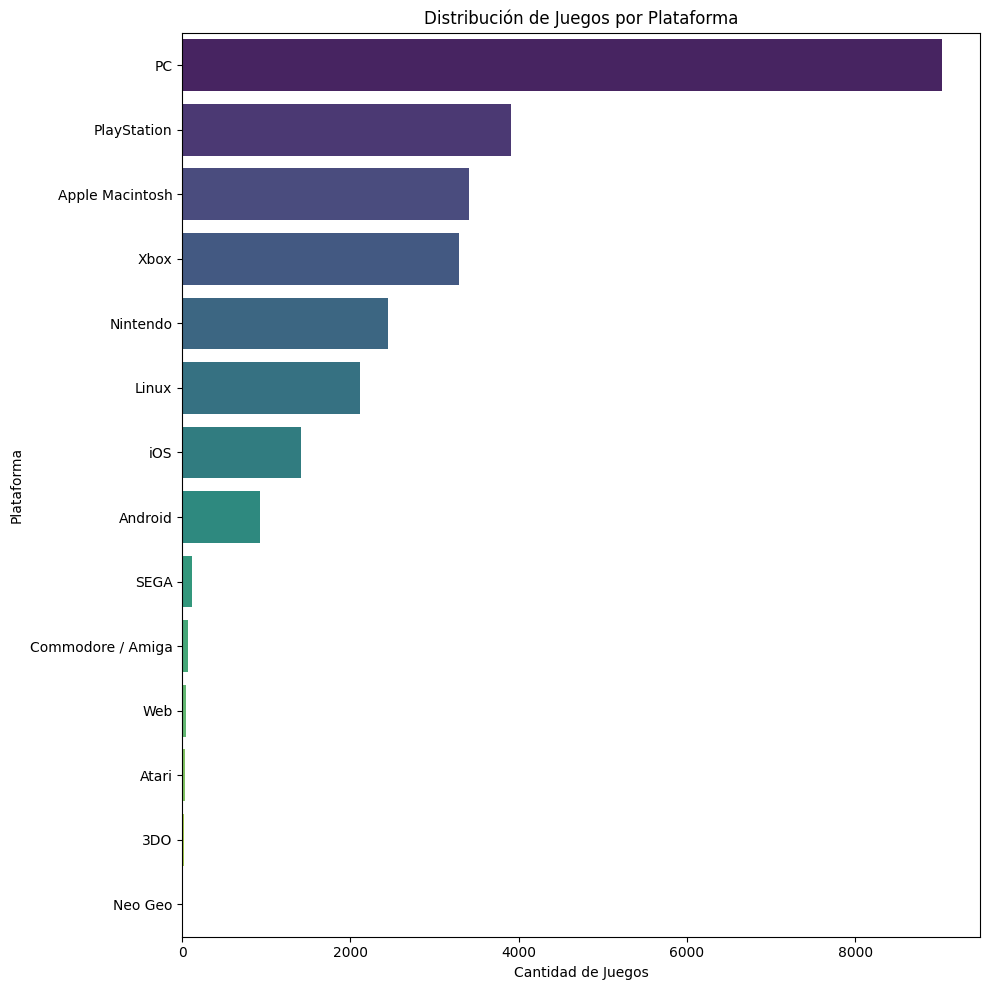

In [ ]:

# 1. Creamos la columna con las listas reales
df_final['platform_visual'] = df_final['platform'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# 2. Explotamos Y reseteamos el índice (esto evita el ValueError)
df_exploded = df_final.explode('platform_visual').reset_index(drop=True)

# 3. Graficamos
plt.figure(figsize=(10, 10)) # Un poco más alto para que quepan bien los nombres
sns.countplot(
    data=df_exploded, 
    y='platform_visual', 
    palette='viridis', 
    order=df_exploded['platform_visual'].value_counts().index
)

plt.title('Distribución de Juegos por Plataforma')
plt.xlabel('Cantidad de Juegos')
plt.ylabel('Plataforma')
plt.tight_layout() # Ajusta los márgenes para que no se corten los nombres
plt.show()

Como ultimo punto se trabajo con los datos originales de platform  pero con una tranformacion para mejor visualizacion, y se puede interpretar que la plataforma con mas juegos es la PC y habian otras como Mac que no se tomaban tanto en cuenta pero cuenta con una significativa cantidad de videojuegos pero tiene una diferencia notable con PC.

-------------------------------------------------------------------
Para la variable Genres queremos ver cuales son los generos más famosos de videojuegos.

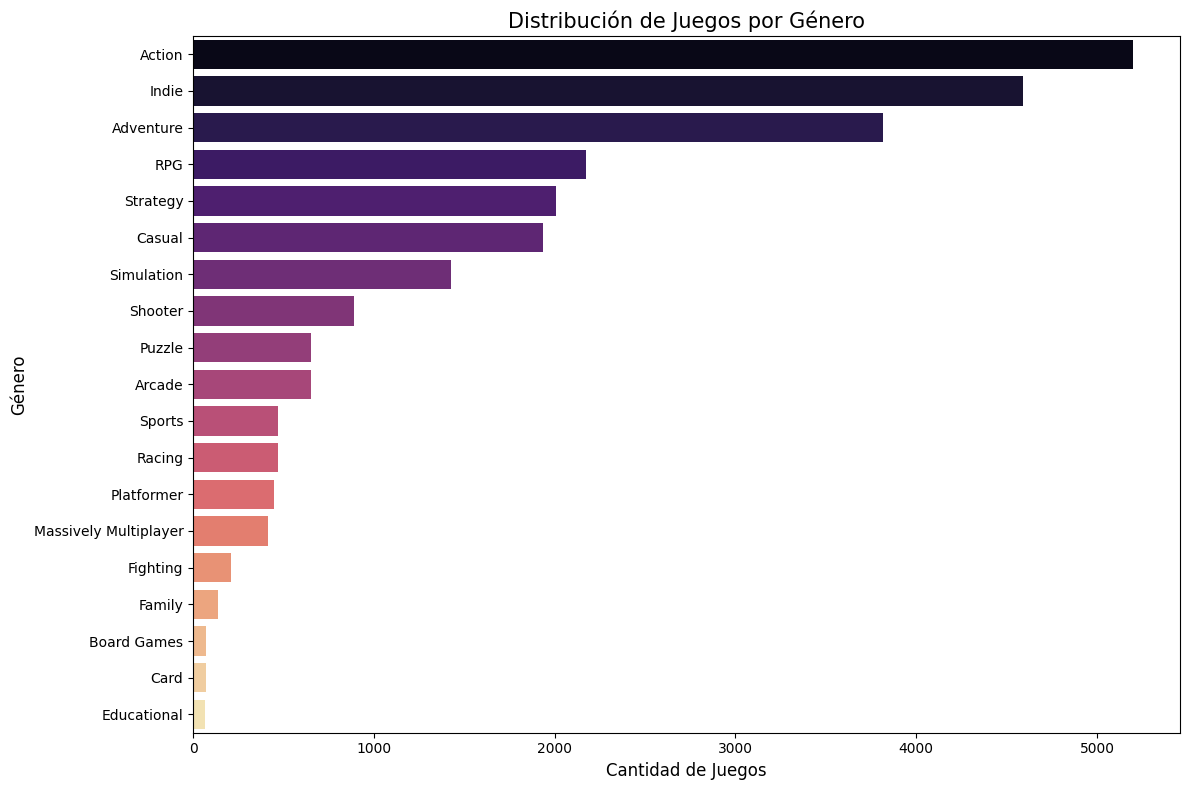

In [95]:
df_final['genres_visual'] = df_final['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

df_genres_exploded = df_final.explode('genres_visual').reset_index(drop=True)

plt.figure(figsize=(12, 8))

sns.countplot(
    data=df_genres_exploded, 
    y='genres_visual', 
    palette='magma', 
    order=df_genres_exploded['genres_visual'].value_counts().index
)

plt.title('Distribución de Juegos por Género', fontsize=15)
plt.xlabel('Cantidad de Juegos', fontsize=12)
plt.ylabel('Género', fontsize=12)
plt.tight_layout()
plt.show()

De esta grafica podemos interpretar que el genero con mas cantidad de videojuegos es accion, tambien esta indies que tiene sentido dado que son los videojuegos mas faciles de crear, y tambien categorias con cantidad bajas como Educacion dado que estos tipos de videojuegos no venden tanto como otros.

# Variables Discretas
 La Variable rating count la estudiamos para ver su relacion posterio con el rating y si los videojuegos tienen una significante cantidad de reseñas

In [99]:
frecuencia_absoluta = df_final['ratings_count'].value_counts().sort_index()

Text(0, 0.5, 'Numero de obervaciones')

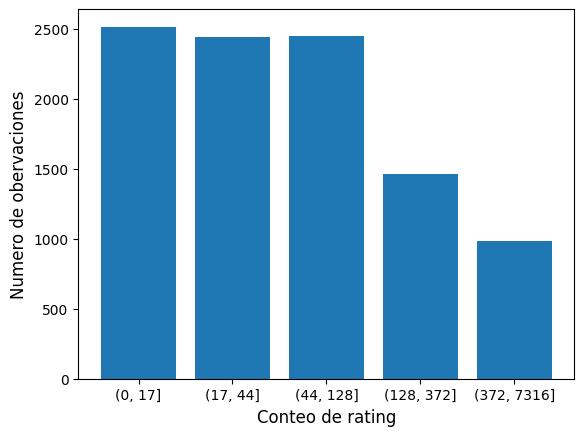

In [102]:
percentiles = np.percentile(df_final["ratings_count"].dropna(), [0, 25, 50, 75, 90, 100])
percentiles = np.unique(percentiles).astype(int) 

df_final["rating_rango"] = pd.cut(
    df_final["ratings_count"],
    bins=percentiles,
    include_lowest=True
)

frecuencia = df_final["rating_rango"].value_counts().sort_index()

nombres_limpios = [
    str(intervalo).replace(".0", "").replace("-0.001", str(percentiles[0])) 
    for intervalo in frecuencia.index
]

nombres_limpios = []
for i, intervalo in enumerate(frecuencia.index):
   
    low = int(round(intervalo.left))
    high = int(round(intervalo.right))
    
    if i == 0:
        low = int(percentiles[0])
    
    nombres_limpios.append(f"({low}, {high}]")

plt.bar(nombres_limpios, frecuencia.values)
plt.xlabel("Conteo de rating", fontsize=12)         
plt.ylabel("Numero de obervaciones", fontsize=12)   


In [103]:
negativos = (df_final["ratings_count"] < 0).sum()
negativos

np.int64(0)

Esta funcion fue creada dado que un princio la grafica era ambigua y parecia tener valores negativos, pero realmente no y se opto por acomodar la escala para una mejor visualizacion.

La gráfica muestra que la mayoría de videojuegos en el dataset reciben una cantidad de valoraciones baja y que un grupo menor de juegos tiene muchas valoraciones que puede darse por ser juegos muy famosos. 

-------------------------------------------------------------------
La Variable status_drop la estudiamos porque parece importante ver cuales videojuegos se dejan de jugar más, las razones pueden ser muchas pero lo normal es que un juego se abandonde porque no genero el suficiente interes en el cliente. 

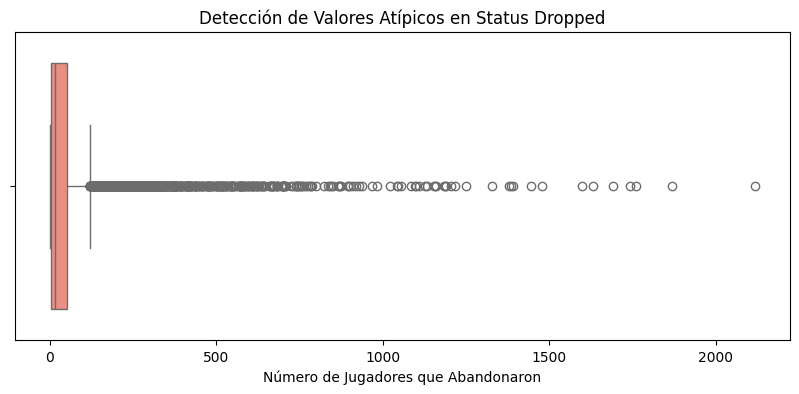

In [104]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_final['status_dropped'], color='salmon')

plt.title('Detección de Valores Atípicos en Status Dropped')
plt.xlabel('Número de Jugadores que Abandonaron')
plt.show()

In [105]:
top_50_abandonados = df_final.nlargest(50, 'status_dropped')
print(top_50_abandonados[['name', 'status_dropped']])

                                     name  status_dropped
3        Counter-Strike: Global Offensive            2116
19                        Team Fortress 2            1868
23                                 Dota 2            1760
34                           Apex Legends            1743
26                          Rocket League            1691
25                               Warframe            1631
14                              Destiny 2            1597
17                               PAYDAY 2            1478
55          PlayerUnknown’s Battlegrounds            1444
7             The Elder Scrolls V: Skyrim            1391
16                              Fallout 4            1385
22                               Terraria            1379
11                          Borderlands 2            1329
6                           Left 4 Dead 2            1249
82                         Super Meat Boy            1218
47                         Stardew Valley            1204
208           

Con la grafica se puede apreciar que una gran cantidad de videojuegos no se dejan de jugar , pero hay outliers que son importantes porque son los juegos que mas se dejaron de jugar, con la lista del top de juegos abandonados podemos ver que hay titulos como CSGO que tiene sentido que tenga abandonos por ser un multiplayer con una secuela como es el caso muchos otros titulos, y tambien titulos con una duracion mayor que el promedio como Skyrim.

-------------------------------------------------------------------
La Variable status_added la estudiamos porque parece importante ver cuales videojuegos son es los que se tiene mayor intension de jugarlos.

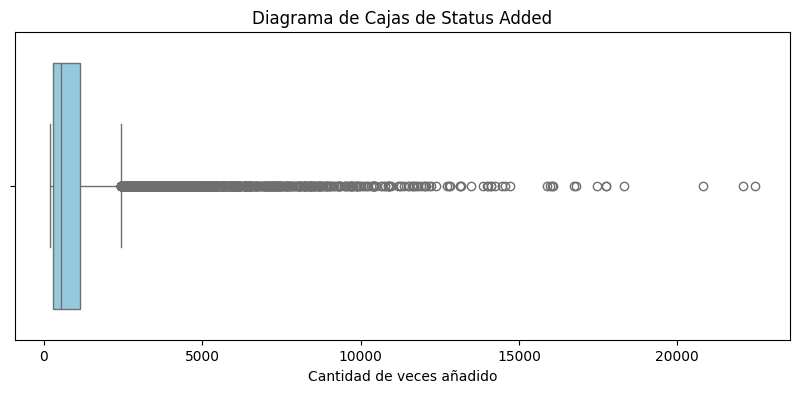

In [106]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_final['added'], color='skyblue')

plt.title('Diagrama de Cajas de Status Added')
plt.xlabel('Cantidad de veces añadido')
plt.show()

Con la grafica se puede apreciar que una gran cantidad de videojuegos no se agregan a la lista de juego,puede darse por que los ya lo tienen comprado o no tienen interes en jugarlo, o simplemente no lo agregan a los juegos, pero hay outliers que son importantes porque son los juegos que mas se agregan a la lista, a partir del top vemos que hay juegos muy famosos, otros que reciben ofertas de compra constantemente. 

In [107]:
top_20_added = df_final.nlargest(20, 'added')
print("Los 20 juegos más añadidos son:")
print(top_20_added[['name', 'added']])

Los 2 juegos más añadidos son:
                                name  added
0                 Grand Theft Auto V  22441
1           The Witcher 3: Wild Hunt  22086
2                           Portal 2  20803
3   Counter-Strike: Global Offensive  18331
4                 Tomb Raider (2013)  17757
5                             Portal  17738
6                      Left 4 Dead 2  17464
7        The Elder Scrolls V: Skyrim  16785
8              Red Dead Redemption 2  16749
9                  BioShock Infinite  16066
10                       Half-Life 2  16042
11                     Borderlands 2  15974
12                   Life is Strange  15870
13                          BioShock  14729
14                         Destiny 2  14565
15                 God of War (2018)  14465
16                         Fallout 4  14243
17                          PAYDAY 2  14123
18                             Limbo  14115
19                   Team Fortress 2  14025


# Variable continua
Para la variable Rating que es la variable numerica continua queremos ver la mayoria de sus atributos dado que es la variable que muestra cuales son los videojuegos con mejor puntaje y esto puede crear valor a partir, esto dado que los videojuegos mejor valorados y más famosos suelen ser los más comprados.

In [108]:
df_final['rating'].mean()

np.float64(3.0554072719886247)

In [109]:
df_final['rating'].median() 

np.float64(3.27)

In [110]:
df_final['rating'].mode()

0    0.0
Name: rating, dtype: float64

Text(0, 0.5, 'Frecuencia')

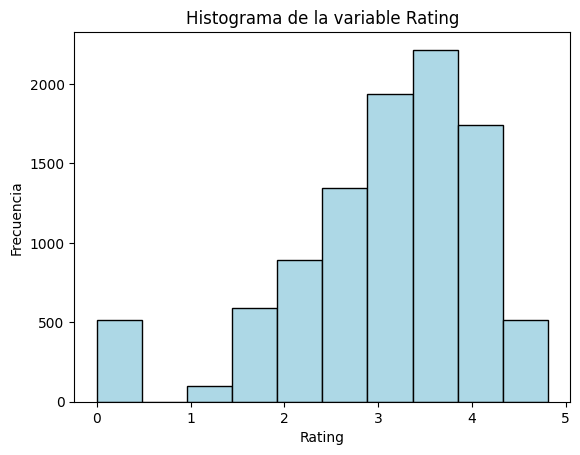

In [111]:
plt.hist(df_final['rating'], color='lightblue',edgecolor='black')
plt.title("Histograma de la variable Rating")
plt.xlabel("Rating")
plt.ylabel("Frecuencia")

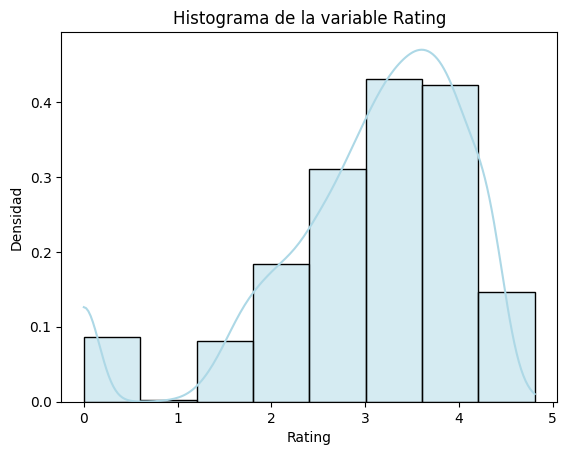

In [115]:
sns.histplot(df_final['rating'],
kde=True,
color='lightblue',
bins=8,
stat='density',
linewidth=1,
)
# Añadir títulos y etiquetas
plt.title("Histograma de la variable Rating")
plt.xlabel("Rating")
plt.ylabel("Densidad")
plt.show()

(3.0, 14.5)

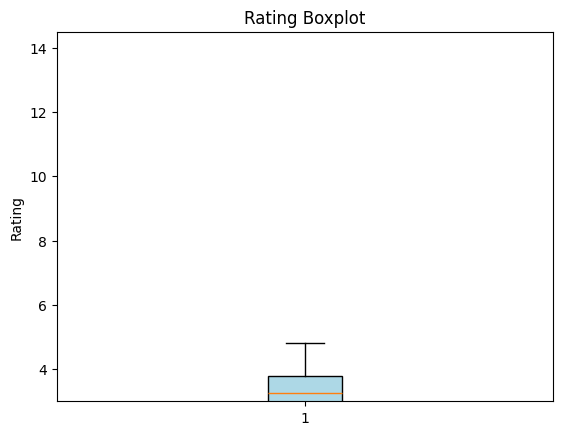

In [116]:
plt.boxplot(df_final['rating'], vert=True, patch_artist=True,
boxprops=dict(facecolor='lightblue'))
# Establecer título y etiquetas
plt.title("Rating Boxplot")
plt.ylabel("Rating")
# Establecer los límites del eje Y
plt.ylim(3, 14.5)

Con estas graficas se puede visualizar que hay videojuegos que tienen una valoracion de 0, en un princio se penso que era normal por una escala que incluia el 0, pero segun la documentacion es porque estos videojuegos no tienen suficientes valoraciones, por lo que se trataron estos datos más adelante.

In [120]:
df_final['rating'].var()

np.float64(1.074119646200033)

In [122]:
skew(df_final['rating'])

np.float64(-1.2519279082782786)

In [123]:
rating_limpio = df_final[df_final['rating'] >= 1]['rating']
skew(rating_limpio)

np.float64(-0.4505218322273591)

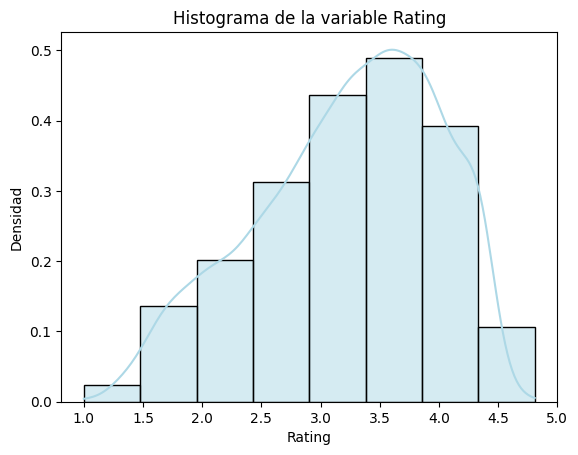

In [124]:
sns.histplot(rating_limpio,
kde=True,
color='lightblue',
bins=8,
stat='density',
linewidth=1,
)
# Añadir títulos y etiquetas
plt.title("Histograma de la variable Rating")
plt.xlabel("Rating")
plt.ylabel("Densidad")
plt.show()

(3.0, 14.5)

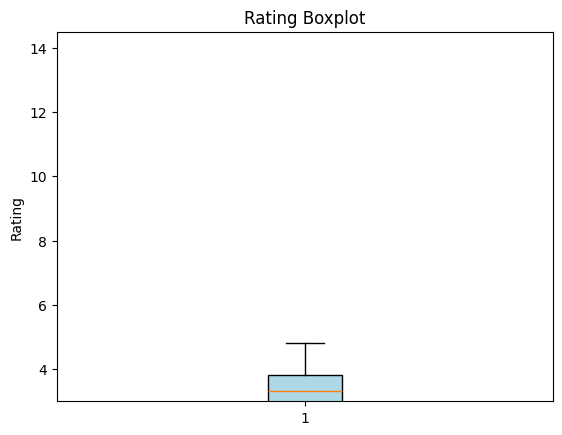

In [125]:
plt.boxplot(rating_limpio, vert=True, patch_artist=True,
boxprops=dict(facecolor='lightblue'))
# Establecer título y etiquetas
plt.title("Rating Boxplot")
plt.ylabel("Rating")
# Establecer los límites del eje Y
plt.ylim(3, 14.5)

In [127]:
kurtosis(rating_limpio)

np.float64(-0.5898691009889392)

In [128]:
kurtosis(rating_limpio, fisher=False)

np.float64(2.410130899011061)

In [129]:
df_final['rating'].describe()

count    9846.000000
mean        3.055407
std         1.036397
min         0.000000
25%         2.560000
50%         3.270000
75%         3.800000
max         4.810000
Name: rating, dtype: float64

Segun las graficas y las medidas de la curtosis y asimetria se muestra que la distribución no es normal, los datos están más repartidos y no presentan muchos valores extremos. La asimetría es ligeramente negativa por lo que la distribución está levemente inclinada hacia la izquierda, con una mayor concentración de valores altos y algunos valores más bajos menos frecuentes. Esto nos indica que puede seguir una distrbucion donde no existan muchos datos outliers pero para un posible modelo se deberia de ajustar los valores.

# EDA Bivariante 

## Rating (puntuación) y Genres (Generos)

Identificar si existen géneros que, por su propia naturaleza o por el perfil de sus jugadores, suelen recibir mejores notas que otros. Queríamos responder a: ¿Es más probable que un juego sea bien valorado solo por pertenecer a un género específico (como RPG o Shooter)?

In [ ]:
def obtener_todos_los_elementos(valor):
    if isinstance(valor, str) and valor.startswith('['):
        try:
            lista = ast.literal_eval(valor)
            return lista if lista else ["Unknown"]
        except:
            return [valor]
    return [valor] if not isinstance(valor, list) else valor

df_final['genres_clean'] = df_final['genres'].apply(obtener_todos_los_elementos)

df_exploded = df_final.explode('genres_clean').reset_index(drop=True)

In [69]:
df_final["genres_clean"] = df_final["genres_clean"].astype(str)

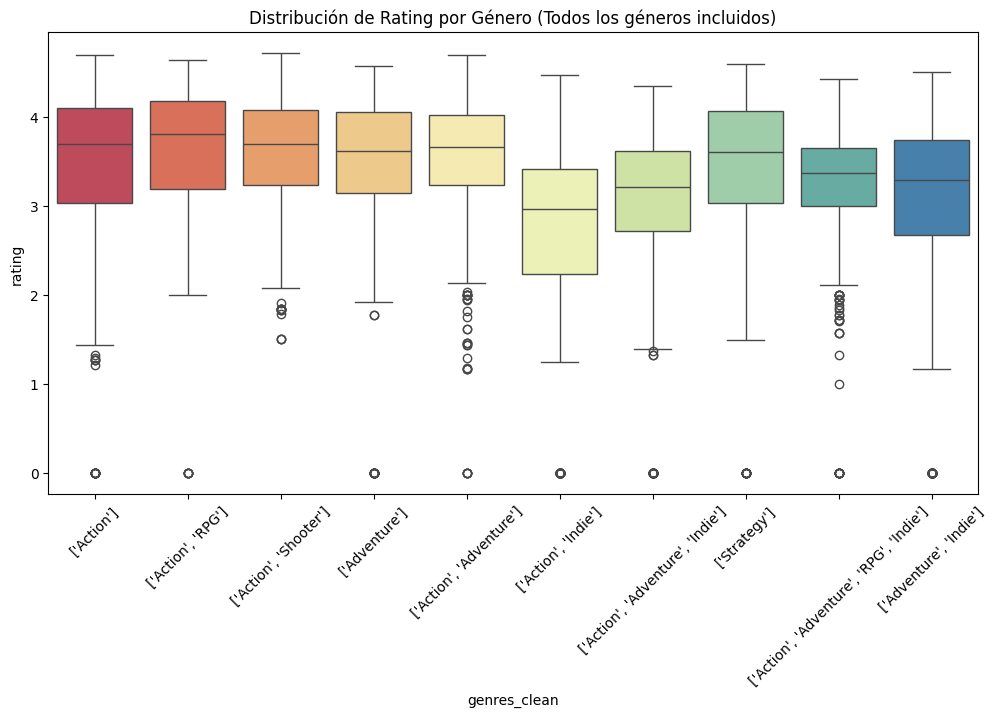

In [119]:
top_10_genres = df_exploded['genres_clean'].value_counts().nlargest(10).index
df_plot = df_exploded[df_exploded['genres_clean'].isin(top_10_genres)]

plt.figure(figsize=(12,6))
sns.boxplot(x='genres_clean', y='rating', data=df_plot, palette="Spectral")

plt.title("Distribución de Rating por Género (Todos los géneros incluidos)")
plt.xticks(rotation=45)
plt.show()

In [ ]:
conteo_generos = df_exploded['genres_clean'].value_counts()
estadisticas_rating = df_exploded.groupby('genres_clean')['rating'].describe()
print(estadisticas_rating.loc[top_10_genres])

               count      mean       std  min     25%    50%     75%   max
genres_clean                                                              
Action        5199.0  3.081383  0.973040  0.0  2.5800  3.250  3.8000  4.75
Indie         4593.0  2.758968  1.068331  0.0  2.1900  2.990  3.5400  4.65
Adventure     3814.0  3.089546  1.025362  0.0  2.6500  3.320  3.8200  4.80
RPG           2171.0  3.099622  1.009440  0.0  2.5700  3.260  3.8400  4.81
Strategy      2007.0  2.902780  1.050751  0.0  2.3700  3.080  3.6500  4.65
Casual        1937.0  2.584125  1.141463  0.0  1.9600  2.780  3.4600  4.65
Simulation    1427.0  2.924744  1.014248  0.0  2.4500  3.140  3.6500  4.53
Shooter        888.0  3.451869  0.698675  0.0  3.0200  3.565  3.9700  4.75
Puzzle         654.0  3.286789  0.861830  0.0  2.9225  3.450  3.8875  4.58
Arcade         652.0  3.323466  0.769074  0.0  2.9400  3.470  3.8625  4.46


Conclusión: Los Géneros "Arcade" y "Fighting": Estos géneros muestran las medianas más altas (la línea dentro de la caja) y, lo más importante, las cajas son más "cortas". Esto indica una alta consistencia: la mayoría de los juegos de estos géneros se mueven en un rango de calidad muy similar y elevado. No hay tanta "basura" que baje la percepción general.

## Rating (numerica) y Added (numerica): 
Correlación alta: Significa que los juegos que la gente más desea son realmente los mejores. 
Correlación baja: Indica que hay juegos con mucho marketing (muchos "added") que terminan siendo decepcionantes (bajo rating).

In [72]:
#Limpiamos la columna ratings de sus 0 NeR (Not enough rating)
rating_clean = df_exploded[df_exploded['rating'] > 0].copy()
rating_clean['genres_clean'] = rating_clean['genres_clean'].astype(str).str.strip()

In [73]:
df_stats = rating_clean.groupby('genres_clean').agg({
    'added': 'sum',
    'rating': 'mean'
}).reset_index()

df_stats = df_stats.sort_values(by='added', ascending=False).head(15)
x = df_stats['added']
y = df_stats['rating']
nombres = df_stats['genres_clean']

In [74]:
df_stats

,genres_clean,added,rating
0,Action,7139508,3.200821
9,Indie,4134056,2.976031
1,Adventure,3998514,3.256018
13,RPG,2707175,3.241464
15,Shooter,2004089,3.475351
18,Strategy,1841125,3.090653
16,Simulation,1323150,3.105365
5,Casual,1307589,2.866810
12,Puzzle,734780,3.385134
11,Platformer,685299,3.607353


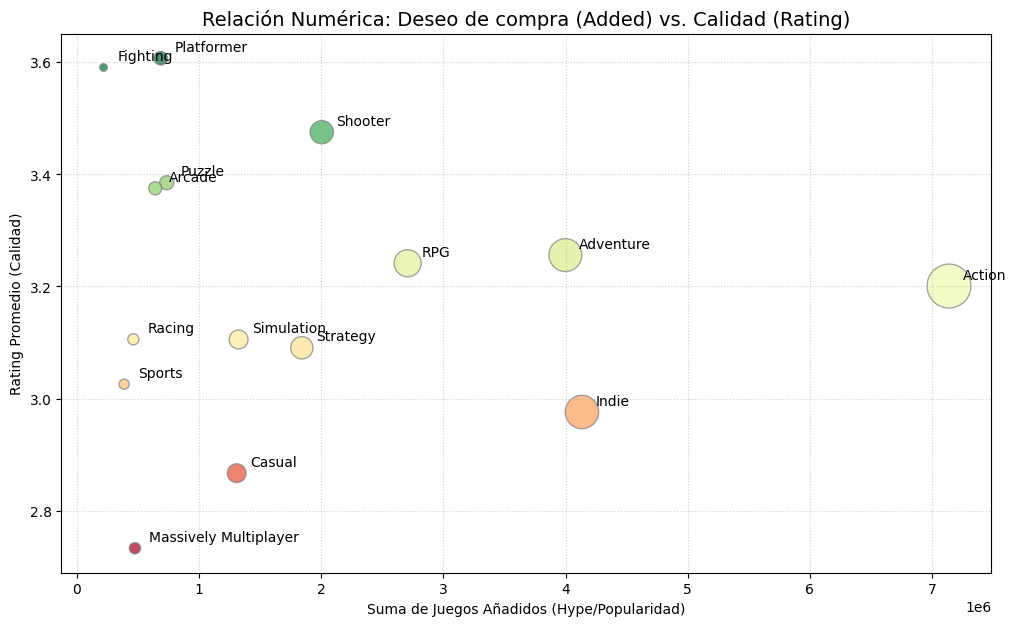

In [75]:
plt.figure(figsize=(12, 7))
plt.scatter(x, y, s=x/x.max()*1000, c=y, cmap='RdYlGn', alpha=0.7, edgecolors='grey')


for i in range(len(df_stats)):
    plt.annotate(nombres.iloc[i], (x.iloc[i], y.iloc[i]), 
                 xytext=(10, 5), textcoords='offset points', fontsize=10)

plt.title('Relación Numérica: Deseo de compra (Added) vs. Calidad (Rating)', fontsize=14)
plt.xlabel('Suma de Juegos Añadidos (Hype/Popularidad)')
plt.ylabel('Rating Promedio (Calidad)')
plt.grid(True, linestyle=':', alpha=0.6)

plt.show()

Conclusión: Existe una brecha significativa entre la expectativa de compra y la satisfacción final en categorías como Indie. El alto volumen de juegos "añadidos" frente a un rating moderado indica que, aunque el marketing y el concepto inicial atraen al usuario, la experiencia de juego no siempre cumple con la expectativa creada. En contraste, los Shooters demuestran una alta eficiencia: generan mucho interés y mantienen una de las valoraciones más altas del mercado.

## Reviews_count (reseñas escritas) y Rating (puntuación)

El Factor Crítico: Si un género tiene muchísimas reseñas escritas (reviews_count) pero un rating bajo, significa que los usuarios están muy descontentos y se quejan por escrito. Es un género "polémico".

El "Amor Silencioso": Si un género tiene un rating muy alto pero pocas reseñas escritas, es un género que gusta mucho pero no genera necesidad de debate.

Los Imprescindibles: Los puntos que estén arriba a la derecha son los géneros que dominan la conversación: la gente los juega, les encantan y además escriben sobre ellos.

In [77]:
df_engagement = rating_clean.groupby('genres_clean').agg({
    'reviews_count': 'sum', 
    'rating': 'mean'         
}).reset_index()
df_engagement = df_engagement.sort_values(by='reviews_count', ascending=False).head(15)

In [78]:
df_engagement

,genres_clean,reviews_count,rating
0,Action,1092193,3.200821
1,Adventure,544237,3.256018
9,Indie,412041,2.976031
13,RPG,386097,3.241464
15,Shooter,363902,3.475351
18,Strategy,182680,3.090653
16,Simulation,137820,3.105365
5,Casual,117172,2.866810
11,Platformer,114326,3.607353
2,Arcade,103471,3.375234


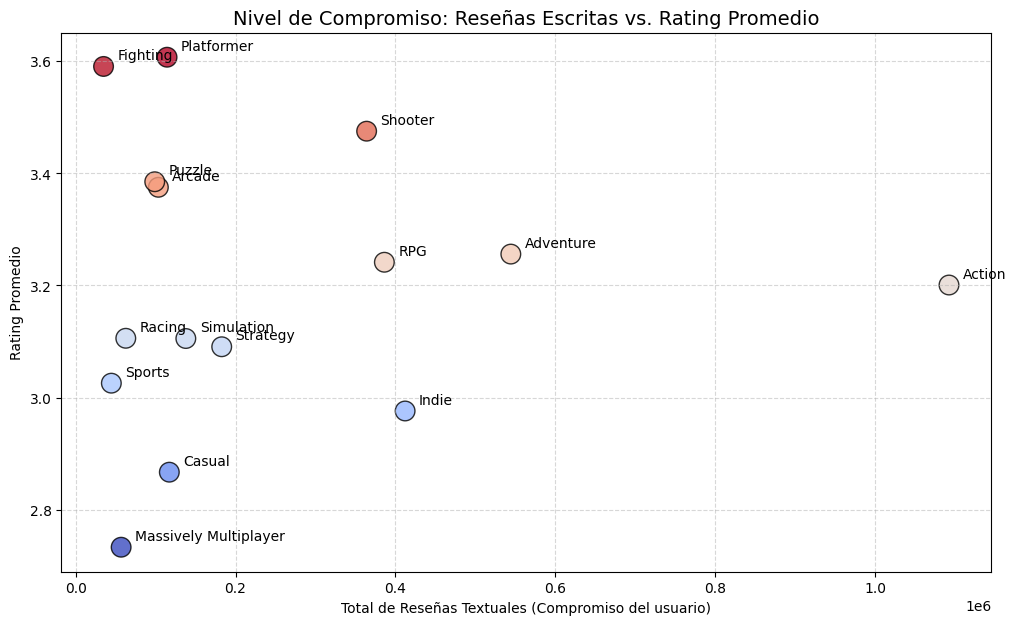

In [79]:
plt.figure(figsize=(12, 7))
plt.scatter(df_engagement['reviews_count'], df_engagement['rating'], 
            s=200, c=df_engagement['rating'], cmap='coolwarm', edgecolors='black', alpha=0.8)

for i in range(len(df_engagement)):
    plt.annotate(df_engagement['genres_clean'].iloc[i], 
                 (df_engagement['reviews_count'].iloc[i], df_engagement['rating'].iloc[i]),
                 xytext=(10, 5), textcoords='offset points')

plt.title('Nivel de Compromiso: Reseñas Escritas vs. Rating Promedio', fontsize=14)
plt.xlabel('Total de Reseñas Textuales (Compromiso del usuario)')
plt.ylabel('Rating Promedio')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

 Conclusión: El volumen de reseñas textuales actúa como un indicador de polarización o pasión. Los géneros con alta densidad de reseñas y ratings moderados indican comunidades muy críticas y vocales. Por el contrario, géneros con ratings altos pero pocas reseñas sugieren una "satisfacción silenciosa", donde el usuario disfruta del producto pero no siente la necesidad de debatir o justificar su valoración en la plataforma.

### Rating (puntuación) and Dropped (dejo de jugarlo)

In [80]:
drop_rating = rating_clean.groupby('genres_clean').agg({
    'status_dropped': 'mean', 
    'rating': 'mean'}).reset_index()

In [81]:
drop_rating

,genres_clean,status_dropped,rating
0,Action,73.858541,3.200821
1,Adventure,45.941697,3.256018
2,Arcade,64.034268,3.375234
3,Board Games,52.164179,2.969403
4,Card,64.779412,3.333088
5,Casual,27.798969,2.866810
6,Educational,42.833333,3.170833
7,Family,65.641791,3.514627
8,Fighting,71.848039,3.590882
9,Indie,38.589479,2.976031


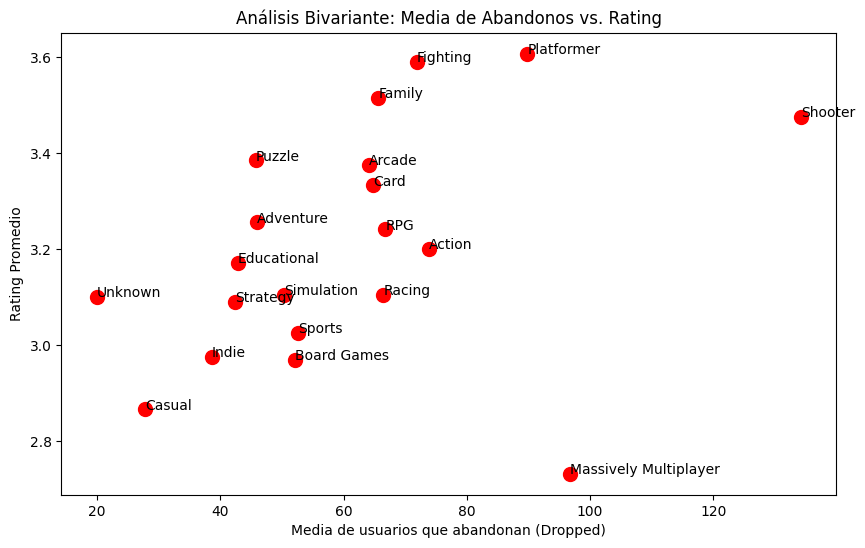

In [82]:
plt.figure(figsize=(10, 6))
plt.scatter(drop_rating['status_dropped'], drop_rating['rating'], s=100, color='red')

for i, txt in enumerate(drop_rating['genres_clean']):
    plt.annotate(txt, (drop_rating['status_dropped'].iloc[i], drop_rating['rating'].iloc[i]))

plt.title('Análisis Bivariante: Media de Abandonos vs. Rating')
plt.xlabel('Media de usuarios que abandonan (Dropped)')
plt.ylabel('Rating Promedio')
plt.show()

Conclusión: El análisis revela que el abandono no siempre es sinónimo de mala calidad, sino que puede estar ligado a la curva de dificultad o extensión del género. Géneros con un ratio de abandono considerable pero notas altas (como la Estrategia o los RPG) demuestran que existe un "filtro de entrada": son juegos que exigen mucho del usuario, y aunque muchos desistan, aquellos que perseveran los valoran como productos de altísima calidad.